In [1]:
# Import Modules
import pandas as pd
import numpy as np
import pickle
import math
import sqlite3
# Import Data
with open('/data1/StackOverflow/Tag_Analysis/df_tags_2023.pickle', 'rb') as fr:
    df_tags = pickle.load(fr)
# Slice preGPT tags.
preGPT = df_tags[(df_tags['creation_date'] > '2021-09-01') & 
        (df_tags['creation_date'] < '2022-12-01')]
# Preprocess
from nltk import FreqDist
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def tag_freq(data):
    tags = data['tags'].str.replace('[\["\]]', '', regex=True)
    tags = [tag for i in tags.apply(lambda x: wc(x)) for tag in i.split(', ')]
    result = FreqDist(tags)
    return result
# Tags Preprocessing
preGPT['tags'] = preGPT['tags'].str.replace('[\["\]]', '', regex=True)
preGPT['tags'] = preGPT['tags'].str.replace('c#','Csharp')
preGPT['tags'] = preGPT['tags'].str.replace('c++','Cpp')
preGPT['tags'] = preGPT['tags'].str.replace('.','DOT')
preGPT['tags'] = preGPT['tags'].str.replace('><',' ')
preGPT['tags'] = preGPT['tags'].str.replace('>','')
preGPT['tags'] = preGPT['tags'].str.replace('-','')
preGPT['tags'] = preGPT['tags'].str.replace('"', '')

preGPT = preGPT.reset_index(drop = True)
preGPT['tags'] = preGPT['tags'].str.replace(',', ' ')
preGPT['tags'] = preGPT['tags'].str.split() 

/tmp/ipykernel_804883/3371618851.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preGPT['tags'] = preGPT['tags'].str.replace('[\["\]]', '', regex=True)
/tmp/ipykernel_804883/3371618851.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preGPT['tags'] = preGPT['tags'].str.replace('c#','Csharp')
/tmp/ipykernel_804883/3371618851.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [7]:
# Extract tag pairs
from collections import defaultdict
from itertools import combinations
tag_pairs = defaultdict(int)
for tags in preGPT['tags']:
    for pair in combinations(tags, 2):
        tag_pairs[tuple(sorted(pair))] += 1
tag_pairs_df = pd.DataFrame(tag_pairs.items(), columns = ['pair', 'count'])

In [9]:
tag_pairs_df

,pair,count
0,"(nodeDOTjs, reactjs)",6473
1,"(express, nodeDOTjs)",9209
2,"(axios, nodeDOTjs)",1239
3,"(nodeDOTjs, refreshtoken)",20
4,"(express, reactjs)",1863
...,...,...
1130728,"(kalmanfilter, multidimensionalarray)",1
1130729,"(multidimensionalarray, pykalman)",1
1130730,"(bluej, karel)",1
1130731,"(commonjs, moduleDOTexports)",1


### 2) Create Co-Occurance Matrix

In [10]:
import networkx as nx
# Create a graph
G = nx.Graph()

# Add edges with weights
for pair, count in tag_pairs.items():
    G.add_edge(pair[0], pair[1], weight=count)

In [15]:
nodes

['nodeDOTjs',
 'reactjs',
 'express',
 'axios',
 'refreshtoken',
 'r',
 'shiny',
 'installation',
 'java',
 'compilation',
 'project',
 'operatorkeyword',
 'firebase',
 'nuxtDOTjs',
 'firebasehosting',
 'dataDOTtable',
 'discordDOTpy',
 'python',
 'texttospeech',
 'frontend',
 'reactsimplemaps',
 'wordpress',
 'wordpresstheming',
 'elementor',
 'javascript',
 'googleplacesapi',
 'matrix',
 'plot',
 'pandas',
 'go',
 'visualstudiocode',
 'interface',
 'gettersetter',
 'typehinting',
 'pylance',
 'gpgsignature',
 'terraform',
 'hashicorp',
 'goreleaser',
 'vlookup',
 'artifactory',
 'docker',
 'jfrogcontainerregistry',
 'github',
 'githubactions',
 'django',
 'djangorestframework',
 'android',
 'androidactivity',
 'launchmode',
 'python3DOTx',
 'expo',
 'reactnative',
 'postgresql',
 'sql',
 'commontableexpression',
 'aspDOTnetcore',
 'servicestack',
 'googlecloudmonitoring',
 'googlecloudplatform',
 'client',
 'DOTnetcore',
 'blazorwebassembly',
 'reacthooks',
 'nearsdkrs',
 'rust',
 's

In [26]:
sample_nodes

[('python', 14221),
 ('javascript', 11661),
 ('java', 10771),
 ('Csharp', 9127),
 ('android', 6986),
 ('Cpp', 6669),
 ('reactjs', 6436),
 ('python3DOTx', 6316),
 ('nodeDOTjs', 6307),
 ('html', 5759),
 ('php', 5524),
 ('json', 4834),
 ('typescript', 4794),
 ('linux', 4587),
 ('arrays', 4562),
 ('r', 4554),
 ('flutter', 4374),
 ('docker', 4329),
 ('ios', 4262),
 ('c', 4223),
 ('DOTnet', 4161),
 ('angular', 4116),
 ('windows', 4090),
 ('api', 4058),
 ('sql', 4002),
 ('css', 3847),
 ('swift', 3802),
 ('kotlin', 3775),
 ('amazonwebservices', 3653),
 ('mysql', 3608),
 ('springboot', 3401),
 ('azure', 3352),
 ('database', 3341),
 ('django', 3255),
 ('reactnative', 3249),
 ('postgresql', 3220),
 ('visualstudiocode', 3101),
 ('pandas', 3060),
 ('function', 3001),
 ('performance', 2911),
 ('macos', 2897),
 ('powershell', 2893),
 ('go', 2835),
 ('dart', 2816),
 ('string', 2785),
 ('laravel', 2773),
 ('sqlserver', 2697),
 ('excel', 2684),
 ('list', 2662),
 ('jquery', 2662),
 ('visualstudio', 2638)

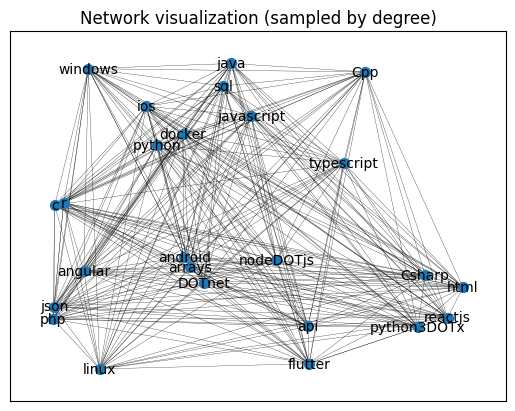

In [52]:
import heapq
import matplotlib.pyplot as plt
# Get a list of all nodes in the graph
nodes = list(G.nodes())

# Calculate the degree of each node
degrees = [(node, G.degree(node)) for node in nodes]



# Create a new graph with the sampled nodes
# Select the top 100 nodes by degree
sample_nodes = heapq.nlargest(25, degrees, key=lambda x: x[1])
sample_nodes = [node for node, degree in sample_nodes if node in G]
sample_G = G.subgraph(sample_nodes)

# Visualize the sampled graph
pos = nx.random_layout(sample_G)#nx.spring_layout(sample_G)
nx.draw_networkx_nodes(sample_G, pos, nodelist=sample_nodes, node_size=50)
nx.draw_networkx_edges(sample_G, pos, width=0.2)
nx.draw_networkx_labels(sample_G, pos, font_size=10)
plt.title("Network visualization (sampled by degree)")
plt.show()

In [77]:
sample_G.nodes()

NodeView(('nodeDOTjs', 'api', 'python', 'linux', 'reactjs', 'windows', 'typescript', 'angular', 'arrays', 'java', 'r', 'ios', 'sql', 'DOTnet', 'Cpp', 'flutter', 'android', 'html', 'python3DOTx', 'docker', 'php', 'javascript', 'Csharp', 'json', 'c'))

### Louvain Community Detection

In [54]:
import community as community_louvain

# Perform Louvain community detection
partition = community_louvain.best_partition(G, weight='weight')

# Print the communities
for tag, community_id in partition.items():
    print(f"Tag: {tag}, Community: {community_id}")

Tag: nodeDOTjs, Community: 0
Tag: reactjs, Community: 0
Tag: express, Community: 0
Tag: axios, Community: 0
Tag: refreshtoken, Community: 1
Tag: r, Community: 21
Tag: shiny, Community: 21
Tag: installation, Community: 21
Tag: java, Community: 1
Tag: compilation, Community: 15
Tag: project, Community: 15
Tag: operatorkeyword, Community: 15
Tag: firebase, Community: 4
Tag: nuxtDOTjs, Community: 0
Tag: firebasehosting, Community: 4
Tag: dataDOTtable, Community: 21
Tag: discordDOTpy, Community: 21
Tag: python, Community: 21
Tag: texttospeech, Community: 21
Tag: frontend, Community: 0
Tag: reactsimplemaps, Community: 0
Tag: wordpress, Community: 5
Tag: wordpresstheming, Community: 5
Tag: elementor, Community: 5
Tag: javascript, Community: 0
Tag: googleplacesapi, Community: 0
Tag: matrix, Community: 21
Tag: plot, Community: 21
Tag: pandas, Community: 21
Tag: go, Community: 6
Tag: visualstudiocode, Community: 15
Tag: interface, Community: 15
Tag: gettersetter, Community: 15
Tag: typehinting, 

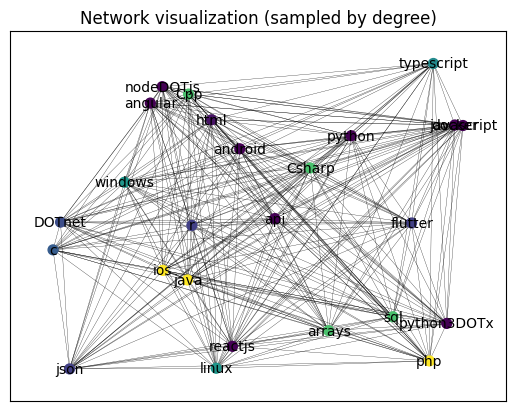

In [71]:
import heapq
import matplotlib.pyplot as plt

# Visualize the sampled graph
pos = nx.random_layout(sample_G)
node_colors = []
for node in sample_G.nodes():
    #community_id = partition[node]
    node_colors.append(partition[node])

nx.draw_networkx_nodes(sample_G, pos, nodelist=sample_nodes, node_size=50, node_color=node_colors)
nx.draw_networkx_edges(sample_G, pos, width=0.2)
nx.draw_networkx_labels(sample_G, pos, font_size=10)
plt.title("Network visualization (sampled by degree)")
plt.show()

In [56]:
# Convert to dataframe.

# Initialize an empty dictionary to store the partition
partition_dict = {}
# Iterate over the partition and store it in the dictionary
for tag, community_id in partition.items():
    if community_id not in partition_dict:
        partition_dict[community_id] = []
    partition_dict[community_id].append(tag)

# Convert the dictionary to a DataFrame
partition_df = pd.DataFrame(list(partition_dict.items()), columns=['Community', 'Tags'])

In [65]:
df_partition = pd.DataFrame.from_dict(data = partition, orient = 'index').reset_index()
df_partition.columns = ['tag', 'community']

In [66]:
df_partition

,tag,community
0,nodeDOTjs,0
1,reactjs,0
2,express,0
3,axios,0
4,refreshtoken,1
...,...,...
44054,irvine16,15
44055,prologcoroutining,21
44056,aif,6
44057,securitystamp,11


In [69]:
df_partition.groupby('community')['tag'].count()

community
0     6548
1     4328
2        2
3        2
4     5390
5     1933
6     4737
7        2
8      752
9      399
10    2536
11    3349
12       2
13     262
14       2
15    6528
16       2
17      25
18       2
19     245
20       4
21    6997
22       2
23       2
24       2
25       2
26       2
27       2
Name: tag, dtype: int64

In [70]:
df_partition[df_partition['community'] == 0]

,tag,community
0,nodeDOTjs,0
1,reactjs,0
2,express,0
3,axios,0
13,nuxtDOTjs,0
...,...,...
44036,libmongoc,0
44043,karmarequirejs,0
44044,karmajasmineajax,0
44049,angularjit,0


### Compute top 10 (volume) tags that compose each community

In [84]:
# Import Modules
import pandas as pd
import numpy as np
import pickle
import math
import sqlite3
# Import Data
with open('/data1/StackOverflow/Tag_Analysis/df_tags_2023.pickle', 'rb') as fr:
    df_tags = pickle.load(fr)
# Slice preGPT tags.
preGPT = df_tags[(df_tags['creation_date'] > '2021-09-01') & 
        (df_tags['creation_date'] < '2022-12-01')]
# Preprocess
from nltk import FreqDist
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def tag_freq(data):
    tags = data['tags'].str.replace('[\["\]]', '', regex=True)
    tags = [tag for i in tags.apply(lambda x: wc(x)) for tag in i.split(', ')]
    result = FreqDist(tags)
    return result
# Tags Preprocessing
preGPT['tags'] = preGPT['tags'].str.replace('[\["\]]', '', regex=True)
preGPT['tags'] = preGPT['tags'].str.replace('c#','Csharp')
preGPT['tags'] = preGPT['tags'].str.replace('c++','Cpp')
preGPT['tags'] = preGPT['tags'].str.replace('.','DOT')
preGPT['tags'] = preGPT['tags'].str.replace('><',' ')
preGPT['tags'] = preGPT['tags'].str.replace('>','')
preGPT['tags'] = preGPT['tags'].str.replace('-','')
#preGPT['tags'] = preGPT['tags'].str.replace('"', '')

preGPT = preGPT.reset_index(drop = True)

/tmp/ipykernel_804883/489553817.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preGPT['tags'] = preGPT['tags'].str.replace('[\["\]]', '', regex=True)
/tmp/ipykernel_804883/489553817.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preGPT['tags'] = preGPT['tags'].str.replace('c#','Csharp')
/tmp/ipykernel_804883/489553817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [85]:
all_tags = tag_freq(preGPT)
all_tags = pd.DataFrame(all_tags, index = ['tags']).transpose().reset_index()

In [86]:
all_tags = all_tags.rename(columns = {'index': 'tag',
                           'tags': 'tag_count'})
all_tags

,tag,tag_count
0,nodeDOTjs,55502
1,reactjs,104992
2,express,12108
3,axios,5682
4,refreshtoken,226
...,...,...
44261,irvine16,1
44262,prologcoroutining,1
44263,aif,1
44264,securitystamp,1


In [87]:
df_merge = pd.merge(df_partition, all_tags, on = 'tag')
df_merge

,tag,community,tag_count
0,nodeDOTjs,0,55502
1,reactjs,0,104992
2,express,0,12108
3,axios,0,5682
4,refreshtoken,1,226
...,...,...,...
44054,irvine16,15,1
44055,prologcoroutining,21,1
44056,aif,6,1
44057,securitystamp,11,1


In [88]:
df_merge[df_merge['tag'] == 'python']

,tag,community,tag_count
17,python,21,298419


In [89]:
top5each = df_merge.groupby('community').apply(lambda group: group.nlargest(10, 'tag_count')).reset_index(drop=True)

In [90]:
top5each

,tag,community,tag_count
0,javascript,0,203077
1,reactjs,0,104992
2,html,0,74597
3,nodeDOTjs,0,55502
4,css,0,53216
...,...,...,...
165,imodeljs,25,1
166,algol,26,2
167,algol68,26,2
168,vdmsl,27,2


In [92]:
df_merge.groupby('community')['tag_count'].sum()

community
0     1324448
1      412535
2           3
3           2
4      481893
5      195142
6      445113
7           2
8      121739
9       62738
10     313968
11     311839
12          2
13      27062
14          3
15     489224
16          3
17       2389
18          2
19       8896
20          6
21    1280597
22          2
23        122
24          4
25          5
26          4
27          3
Name: tag_count, dtype: int64

In [136]:
top5each[top5each['community'] == 5]

,tag,community,tag_count
34,php,5,49660
35,laravel,5,23135
36,wordpress,5,12447
37,woocommerce,5,3993
38,pdf,5,3522
39,laravel8,5,3494
40,apache,5,3010
41,symfony,5,2992
42,email,5,2679
43,eloquent,5,2607


In [138]:
#import pickle
#with open(file = 'louvain_community.pickle', mode = 'wb') as file:
#    pickle.dump(df_merge, file)

In [1]:
import pickle
with open(file = 'louvain_community.pickle', mode = 'rb') as file:
    data = pickle.load(file)

In [2]:
data

,tag,community,tag_count
0,nodeDOTjs,0,55502
1,reactjs,0,104992
2,express,0,12108
3,axios,0,5682
4,refreshtoken,1,226
...,...,...,...
44054,irvine16,15,1
44055,prologcoroutining,21,1
44056,aif,6,1
44057,securitystamp,11,1


In [8]:
data[data['community'] == 3]

,tag,community,tag_count
41987,jibx,3,1
41988,mavenjibx,3,1
